<a href="https://colab.research.google.com/github/frank2720/DAtasks/blob/main/Am_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Case

You work in analytics at Santander Bank, an international banking company. You have been tasked with predicting customer loan default on their small business loans in their US market.


A basic description of the [LoanDefault.csv](https://github.com/CHill-MSU/INFO583/blob/main/LoanDefault.csv) dataset is below:

| Variable | Description |
| ----------- | ----------- |
| Status | indicates if the customer is Current or if their loan is in Default|
| Credit.Grade | the customer's credit rating (ordered from best to worst): HR, AA, A, B, C, D, E, NC|
| Amount| the original amount of the loan|
| Age| the age of the loan, in years|
| Borrower.Rate | the interest rate of the loan|
| Debt.To.Income.Ratio | the ratio of the customers debt to their income|

<hr>



## Import Packages:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import *
set_config(transform_output = "pandas")

<hr>

## Questions:

>  0. **(a) Use the 'LoanDefault.csv' file to create a dataframe named data. Then, view the first 5 observations in the `data` dataframe.**

In [ ]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('LoanDefault.csv')
data.head()

Saving LoanDefault.csv to LoanDefault (5).csv


,Status,Credit.Grade,Amount,Age,Borrower.Rate,Debt.To.Income.Ratio
0,Current,HR,1000,3,0.1500,0.020
1,Current,HR,1000,5,0.2900,0.020
2,Current,D,1000,8,0.2195,0.013
3,Current,B,1000,10,0.1500,0.020
4,Current,HR,1000,10,0.1490,0.015


>  0. **(b) View the dataframe information to evaluate variable types and missingness.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261 entries, 0 to 5260
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Status                5261 non-null   object 
 1   Credit.Grade          5261 non-null   object 
 2   Amount                5261 non-null   int64  
 3   Age                   5261 non-null   int64  
 4   Borrower.Rate         5261 non-null   float64
 5   Debt.To.Income.Ratio  5261 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 246.7+ KB


>  0. **(c) Identify variables by variable type and make any necessary transformations.**

In [ ]:

cat_vars = ['Status', 'Credit.Grade']
num_vars = ['Amount', 'Age', 'Borrower.Rate', 'Debt.To.Income.Ratio']

#encoding target variable and ordered categorical
data['Status'] = data['Status'].map({'Current': 0, 'Default': 1})

credit_order = {'HR': 0, 'AA': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'NC': 7}
data['Credit.Grade'] = data['Credit.Grade'].map(credit_order)

>  0. **(d)  View descriptive statistic information for the dataframe.**

In [ ]:
data.describe()

,Status,Credit.Grade,Amount,Age,Borrower.Rate,Debt.To.Income.Ratio
count,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000
mean,0.014256,3.260977,4852.771526,4.398023,0.190446,48.389143
std,0.118555,2.224846,4466.048722,2.744734,0.068078,1069.288295
min,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2025.000000,2.000000,0.140000,0.090000
50%,0.000000,4.000000,3001.000000,4.000000,0.189800,0.160000
75%,0.000000,5.000000,6000.000000,6.000000,0.240000,0.250000
max,1.000000,7.000000,25000.000000,14.000000,0.497500,51280.070000


>  0. **(e) Visualize the distribution of the target variable, `Status`.**

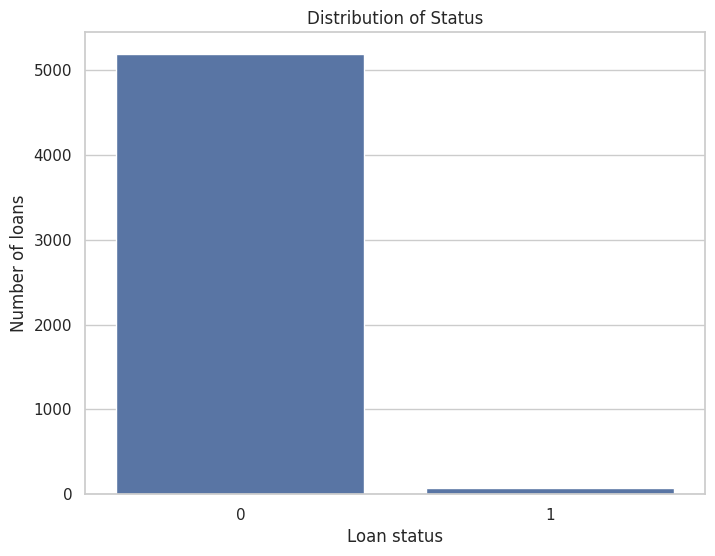

In [ ]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Status')
plt.title('Distribution of Status')
plt.xlabel('Loan status')
plt.ylabel('Number of loans')
plt.show()



---



>  1. **(a) (5) First, identify your predictor and target variables. Create `X`, which contains all predictor variables. Create `y`, which contains the target variable.**

In [ ]:
y = data['Status']
X = data.drop('Status', axis=1)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5261, 5)
y shape: (5261,)


>  1. **(b) (5) Next you will create the train and test sets from the `X` and `y` objects. For classification problems, it is important to preserve the distribution of the target variable in the training and testing sets. View the documentation for the `train_test_split` function and modify the necessary function argument to do this.  Use a 80/20 train/test split and a random state of 123.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
print("train set shape:", X_train.shape)
print("test set shape:", X_test.shape)

#the distribution of target variable preserved in each set
print("\ntrain set target distribution:", y_train.value_counts(normalize=True))
print("\ntest set target distribution:", y_test.value_counts(normalize=True))

train set shape: (4208, 5)
test set shape: (1053, 5)

train set target distribution: Status
0    0.985741
1    0.014259
Name: proportion, dtype: float64

test set target distribution: Status
0    0.985755
1    0.014245
Name: proportion, dtype: float64




---



>  2. **(10) Next, set up a preprocessing pipeline to prepare the data for analysis.**

In [ ]:
num_features = ['Amount', 'Age', 'Borrower.Rate', 'Debt.To.Income.Ratio', 'Credit.Grade']

num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features)])



---



>  3. **(a) (10) First, you will tune a Decision Tree model to identify the optimal `max_depth` and `min_sample_split` values. Consider maximum depth values from 2-5 and minimum sample split values from 2-10. Instantiate the Pipeline and grid for the grid search and output your search grid. If class imbalance is present, use class weights to address it. Use a random state of 123.**

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=123, class_weight='balanced'))])

#defining parameter grid for tuning
param_grid = {
    'classifier__max_depth': [2, 3, 4, 5],
    'classifier__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

print("Grid Search Parameter Grid:")
print(param_grid)

Grid Search Parameter Grid:
{'classifier__max_depth': [2, 3, 4, 5], 'classifier__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


>  3. **(b) (10) Next, perform the grid search using 5-Fold Cross validation. Use accuracy to choose the best model.**

In [ ]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Amount',
                                                                          'Age',
                                                                          'Borrower.Rate',
                                                                          'Debt.To.Income.Ratio',
                                                                          'Credit.Grade'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=123))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [2, 3, 4, 5],
                         'classifier__min_samples_split': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10]},
             scoring='accuracy')

>  3. **(c) (5) Output the optimal values of `max_depth` and `min_samples_split` and the corresponding training accuracy.**




In [ ]:
best_max_depth = grid_search.best_params_['classifier__max_depth']
best_min_samples_split = grid_search.best_params_['classifier__min_samples_split']

print("Optimal max_depth:", best_max_depth)
print("Optimal min_samples_split:", best_min_samples_split)

y_train_pred = grid_search.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Optimal max_depth: 5
Optimal min_samples_split: 2
Training Accuracy: 0.8512357414448669


<hr>

>  4. **(10) Output variable importance for the model. What is the most important variable in predicting if a customer will default?**

In [ ]:
best_model = grid_search.best_estimator_.named_steps['classifier']
feature_names = num_features
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Variable Importance:")
print(feature_importance_df)

Variable Importance:
                Feature  Importance
1                   Age    0.838292
2         Borrower.Rate    0.081145
3  Debt.To.Income.Ratio    0.040461
4          Credit.Grade    0.040103
0                Amount    0.000000


Age is the most important variable in predicting if a customer will default the loan.



---



>  5. **(a) (10) Next, you will tune a Random Forest model to identify the optimal number of trees. Consider sizes of 50, 100, 150, 200, and 250. Instantiate the Pipeline and grid for the grid search and output the search grid. If class imbalance is present, use class weights to address it. Use a random state of 123.**

In [ ]:
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=123, class_weight='balanced'))])

param_grid = {
    'classifier__n_estimators': [50, 100, 150, 200, 250]
}

print("Grid Search Parameter Grid:")
print(param_grid)

Grid Search Parameter Grid:
{'classifier__n_estimators': [50, 100, 150, 200, 250]}


>  5. **(b) (10) Perform the grid search using 5-Fold Cross validation. Use accuracy to choose the best model.**

In [ ]:
rf_grid_search = GridSearchCV(estimator=rf_pipe, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Amount',
                                                                          'Age',
                                                                          'Borrower.Rate',
                                                                          'Debt.To.Income.Ratio',
                                                                          'Credit.Grade'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=123))]),
             n_jobs=-1,
             param_grid={'classifier__n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy')

>  5. **(c) (5) Output the optimal number of trees and the corresponding training accuracy.**

In [ ]:
best_n_estimators = rf_grid_search.best_params_['classifier__n_estimators']
print("Optimal number of trees:", best_n_estimators)

#getting the best model from the grid search
best_rf_model = rf_grid_search.best_estimator_

y_train_pred_rf = best_rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
print("Training Accuracy:", train_accuracy)

Optimal number of trees: 50
Training Accuracy: 0.9995247148288974




---



>  6. **(a) (5) Obtain test set predictions for your tuned Decision Tree and Random Forest classification models.**

In [ ]:
best_dt_model= grid_search.best_estimator_
y_pred_dt= best_dt_model.predict(X_test)

best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

>  6. **(b) (5) Output the classification reports for the two models. Be sure to label the output by model.**

In [ ]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Current', 'Default']))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Current', 'Default']))

Decision Tree Classification Report:
              precision    recall  f1-score   support

     Current       1.00      0.84      0.91      1038
     Default       0.07      0.87      0.14        15

    accuracy                           0.85      1053
   macro avg       0.54      0.86      0.53      1053
weighted avg       0.98      0.85      0.90      1053


Random Forest Classification Report:
              precision    recall  f1-score   support

     Current       0.99      1.00      0.99      1038
     Default       0.60      0.20      0.30        15

    accuracy                           0.99      1053
   macro avg       0.79      0.60      0.65      1053
weighted avg       0.98      0.99      0.98      1053



>  6. **(c) (10) Based on your output, which model would you recommend Santander use to predict loan defaults. Why? Explain.**

Random Forest model is recommended because it achieved much higher overall accuracy (99%) and better precision for predicting defaults than the Decision Tree. Also Decision Tree over-predicted defaults and was less reliable.